<a href="https://colab.research.google.com/github/acio-o9/python-workspace/blob/feature%2Fbook-value-predict-animal-crossing/AnimalCrossing_BookPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('drive/My Drive/animal_crossing_book_values.csv')
df

,class,Mon-AM,Mon-PM,Tue-AM,Tue-PM,Wed-AM,Wed-PM,Thu-AM,Thu-PM,Fri-AM,Fri-PM,Sat-AM,Sat-PM
0,wave,125,142,145,116,85,78,67,137,125,105,74,64
1,wave,96,97,106,59,54,47,114,96,59,54,122,132
2,third,86,102,156,214,142,126,84,86,64,41,43,55
3,wave,58,52,117,64,58,51,125,105,114,115,120,112
4,wave,85,76,71,103,141,115,91,145,81,71,140,115
5,wave,63,56,49,104,91,68,66,43,123,86,123,104
6,forth,58,98,121,136,167,153,53,50,46,43,39,35
7,wave,68,62,52,103,114,111,117,95,94,111,77,69
8,third,98,92,87,83,79,75,104,210,562,177,135,67
9,wave,89,112,107,91,99,63,59,55,114,119,70,110


In [3]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]
print(X.shape, y.shape)

(11, 12) (11,)


In [4]:
X.head()

,Mon-AM,Mon-PM,Tue-AM,Tue-PM,Wed-AM,Wed-PM,Thu-AM,Thu-PM,Fri-AM,Fri-PM,Sat-AM,Sat-PM
0,125,142,145,116,85,78,67,137,125,105,74,64
1,96,97,106,59,54,47,114,96,59,54,122,132
2,86,102,156,214,142,126,84,86,64,41,43,55
3,58,52,117,64,58,51,125,105,114,115,120,112
4,85,76,71,103,141,115,91,145,81,71,140,115


In [5]:
from sklearn.preprocessing import StandardScaler

# ベルを標準化する
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
X_std

array([[ 2.07466539,  2.1020526 ,  1.36891378,  0.11576855, -0.61550555,
        -0.41636419, -0.82988588,  0.65223482, -0.04518762,  0.40469811,
        -0.41816361, -0.6366241 ],
       [ 0.60721914,  0.32034706,  0.19673012, -1.25379523, -1.43537819,
        -0.76954873,  0.50257064, -0.20787601, -0.52063996, -0.89264841,
         0.86550142,  1.59903235],
       [ 0.10120319,  0.51831434,  1.69952968,  2.47045715,  0.89200219,
         0.13050221, -0.34793352, -0.41765914, -0.48462084, -1.22334458,
        -1.24719728, -0.9325198 ],
       [-1.31564147, -1.46135849,  0.52734603, -1.13365806, -1.32958817,
        -0.72397653,  0.81442217, -0.01907119, -0.12442968,  0.65907979,
         0.81201538,  0.94148634],
       [ 0.05060159, -0.51111553, -0.85522956, -0.1965881 ,  0.86555469,
         0.00517866, -0.14948255,  0.82006133, -0.36215585, -0.46019957,
         1.34687581,  1.04011824],
       [-1.06263349, -1.30298466, -1.51646137, -0.17256067, -0.45682053,
        -0.53029469, -

# 標準化データだけでグラフを表示

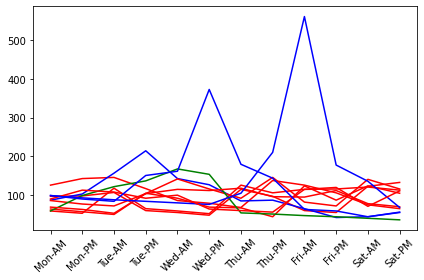

In [14]:
import matplotlib.pyplot as plt
colors = {'wave': 'red', 'third': 'blue', 'forth': 'green'}
dayOfWeek = ['Mon-AM', 'Mon-PM', 'Tue-AM', 'Tue-PM', 'Wed-AM', 'Wed-PM',
             'Thu-AM', 'Thu-PM', 'Fri-AM', 'Fri-PM', 'Sat-AM', 'Sat-PM']

for x, label in zip(X.values, y):
    plt.plot(dayOfWeek, x, color=colors[label])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

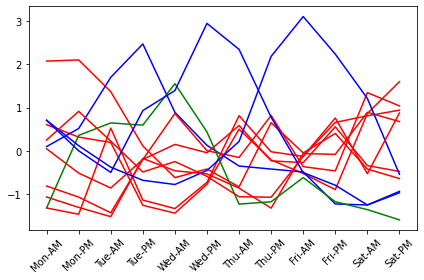

In [16]:
for x, label in zip(X_std, y):
    plt.plot(dayOfWeek, x, color=colors[label])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ロジスティック回帰を使ってモデルを作成

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# 適当な値でパターンを予測する

In [68]:
test = [[125, 142, 145, 116, 85, 78, 67, 137, 100, 105, 74, 0]]
print(lr.predict(test))
print(lr.predict_proba(test))

['wave']
[[1.10021483e-05 1.12510569e-03 9.98863892e-01]]


In [69]:
test = [[98, 92, 87, 83, 79, 75, 104, 210, 562, 177, 135, 67]]
print(lr.predict(test))
print(lr.predict_proba(test))

['third']
[[1.18237366e-16 9.99634858e-01 3.65141698e-04]]


In [70]:
test = [[58, 98, 121, 136, 167, 153, 53, 50, 46, 43, 39, 35]]
print(lr.predict(test))
print(lr.predict_proba(test))

['forth']
[[9.97553542e-01 2.04543718e-03 4.01020610e-04]]


# 判定に重要な特徴量をランダムフォレストを使って探す


In [91]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_std, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
test = [[125, 142, 145, 116, 85, 78, 67, 137, 100, 105, 74, 0]]
print(forest.predict(test))
print(forest.predict_proba(test))
test = [[98, 92, 87, 83, 79, 75, 104, 210, 562, 177, 135, 67]]
print(forest.predict(test))
print(forest.predict_proba(test))
test = [[58, 98, 200, 136, 167, 120, 53, 50, 46, 43, 39, 35]]
print(forest.predict(test))
print(forest.predict_proba(test))

['third']
[[0.13 0.57 0.3 ]]
['third']
[[0.11 0.55 0.34]]
['third']
[[0.11 0.55 0.34]]


サンプル数が少なすぎて全然うまく動いていない。。。

In [95]:
feature_list = []
for index in range(0, len(dayOfWeek)):
    feature_list.append([dayOfWeek[index], forest.feature_importances_[index]])
    print('%2d) %-*s %f' % (index+1, 20, dayOfWeek[index], forest.feature_importances_[index]))

 1) Mon-AM               0.059924
 2) Mon-PM               0.043426
 3) Tue-AM               0.015158
 4) Tue-PM               0.097076
 5) Wed-AM               0.103361
 6) Wed-PM               0.111431
 7) Thu-AM               0.065361
 8) Thu-PM               0.071054
 9) Fri-AM               0.071282
10) Fri-PM               0.091205
11) Sat-AM               0.117242
12) Sat-PM               0.153480


In [96]:
f_data = pd.DataFrame(feature_list)
f_data

,0,1
0,Mon-AM,0.059924
1,Mon-PM,0.043426
2,Tue-AM,0.015158
3,Tue-PM,0.097076
4,Wed-AM,0.103361
5,Wed-PM,0.111431
6,Thu-AM,0.065361
7,Thu-PM,0.071054
8,Fri-AM,0.071282
9,Fri-PM,0.091205


# 重要な特徴量順にソートする

In [98]:
# 曜日全体の上位５指標
f_data.sort_values(by=1, ascending=False).head(5)

,0,1
11,Sat-PM,0.153480
10,Sat-AM,0.117242
5,Wed-PM,0.111431
4,Wed-AM,0.103361
3,Tue-PM,0.097076


In [99]:
# 土曜日の情報を除いた上位5指標
f_data.iloc[0:10, :].sort_values(by=1, ascending=False).head(5)

,0,1
5,Wed-PM,0.111431
4,Wed-AM,0.103361
3,Tue-PM,0.097076
9,Fri-PM,0.091205
8,Fri-AM,0.071282
